## **TER**

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from IPython.display import display, HTML

# chemin en modifer
chemin = "dataprojectstage_masterUPS.xlsx"

df = pd.read_excel(chemin)

In [ ]:
!pip install PiML

In [ ]:
from piml import Experiment
exp = Experiment(highcode_only=True)

(CVXPY) Feb 26 05:21:53 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 26 05:21:53 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


---
## ***Visualisation des données***
---

In [ ]:
# transforme les variables ages en catégories (18-23, 24-30, 31-40, 41-50, 51-60, 61-70, 71-90)
df['Age'] = pd.cut(df['Age'], bins=[0, 23, 30, 40, 50, 60, 70, 100], labels=['0-23', '24-30', '31-40', '41-50', '51-60', '61-70', '71-100'])
df['Age'].value_counts()

51-60     1760
41-50     1711
31-40     1332
24-30      967
61-70      738
0-23       570
71-100     362
Name: Age, dtype: int64

In [ ]:
# transforme les variables job tenure en catégories (0-2, 3-5, 6-10, 11-20, 21-30, 31-40, 41-50, 51-80)
df['Job tenure'] = pd.cut(df['Job tenure'], bins=[-1, 1, 2, 5, 10, 20, 30, 40, 50, 82], labels=['0-1', '1-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-82'])
df['Job tenure'].value_counts()

0-1      1786
11-20    1350
3-5      1313
6-10     1224
21-30     771
1-2       646
31-40     291
41-50      55
51-82       4
Name: Job tenure, dtype: int64

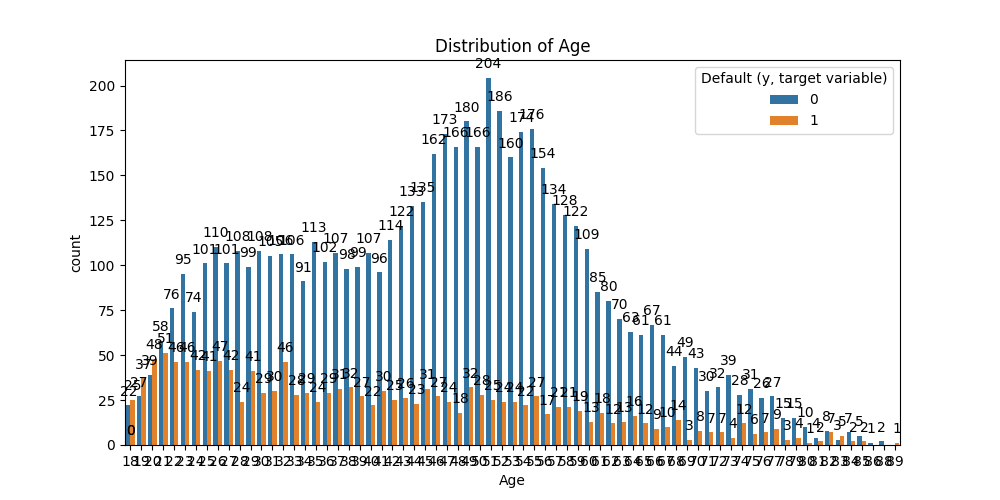

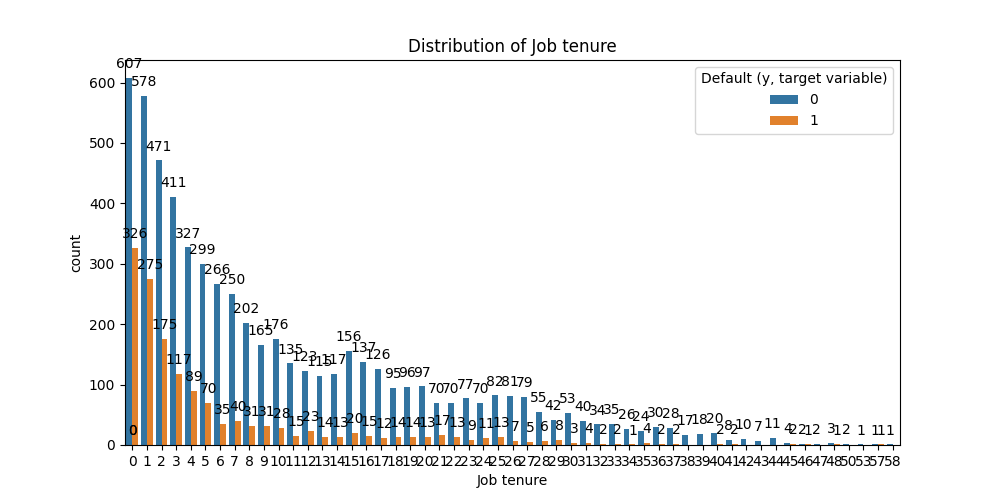

In [ ]:
from matplotlib.pyplot import scatter


# distribution de la variable cible en fonction de l'age
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Age', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.show()

# distribution de la variable cible en fonction de l'ancienneté
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Job tenure', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.show()



In [ ]:
# plot de la variable cible en fonction de credit event
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Credit event', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Credit event')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')




In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Car price"], df["Funding amount"], c=df["Default (y, target variable)"], cmap='coolwarm')
plt.xlabel('Fund amount')
plt.ylabel('Age')
# legend for y_train
plt.legend(*scatter.legend_elements(), title="Default")
plt.show()

---
#### ***Standardisation des données numériques***
---

In [115]:
from sklearn.preprocessing import StandardScaler

# standard scaler pour numeric variables uniquement sans la variable cible
scaler = StandardScaler()
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.drop(columns=['Default (y, target variable)'])
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)




---
#### ***Encodage variables catégorielles***
---

In [117]:
# One hot encoding pour les variables catégorielles
from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(handle_unknown="error")
#age_encod = encoder.fit_transform(df[["Age"]]).toarray()
#df_age_encoded = pd.DataFrame(age_encod, columns=encoder.get_feature_names_out())
#jobtenure_encod = encoder.fit_transform(df[["Job tenure"]]).toarray()
#df_jobtenure_encoded = pd.DataFrame(jobtenure_encod, columns=encoder.get_feature_names_out())

#df1 = pd.concat([df_scaled, df_age_encoded], axis=1)
#df1 = pd.concat([df1, df_jobtenure_encoded], axis=1)
#df1 = pd.concat([df1, df["Default (y, target variable)"]], axis=1)
df1 = pd.concat([df_scaled, df["Default (y, target variable)"]], axis=1)

ID                              0
Job tenure                      0
Age                             0
Car price                       0
Funding amount                  0
Down payment                    0
Loan duration                   0
Monthly payment                 0
Credit event                    0
Married                         0
Homeowner                       0
Default (y, target variable)    0
dtype: int64


---
## ***Train Test Split***
---

In [119]:
from sklearn.model_selection import train_test_split
X = df1.drop("Default (y, target variable)", axis=1)
X = X.drop("ID", axis=1) # colonne inutile
y = df1["Default (y, target variable)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=1/3, random_state=42)

print(f"TRAIN SIZE: {X_train.shape[0], y_train.shape[0]} -> {X_train.shape[0] / X.shape[0] * 100:.2f}%")
print(f"VAL   SIZE: {X_val.shape[0], y_val.shape[0]} -> {X_val.shape[0] / X.shape[0] * 100:.2f}%")
print(f"TEST  SIZE: {X_test.shape[0], y_test.shape[0]} -> {X_test.shape[0] / X.shape[0] * 100:.2f}%")

TRAIN SIZE: (5082, 5082) -> 69.99%
VAL   SIZE: (1452, 1452) -> 20.00%
TEST  SIZE: (727, 727) -> 10.01%


---
## ***PCA***
---

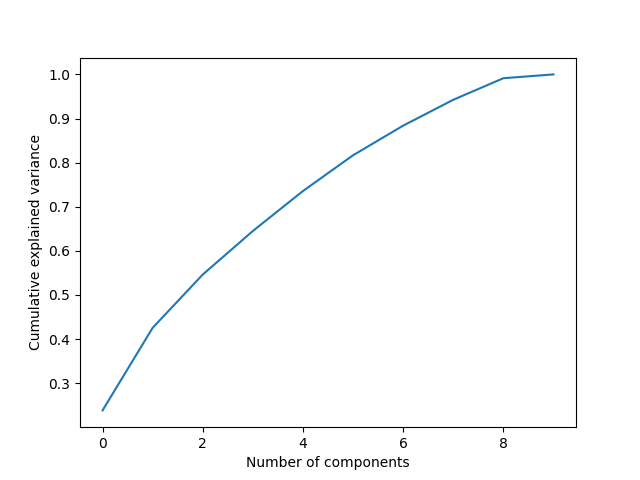

In [ ]:
# proportion of variance explained en fonction du nombre de composantes
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


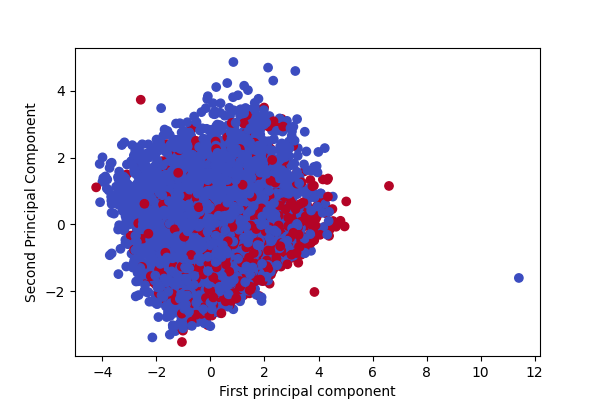

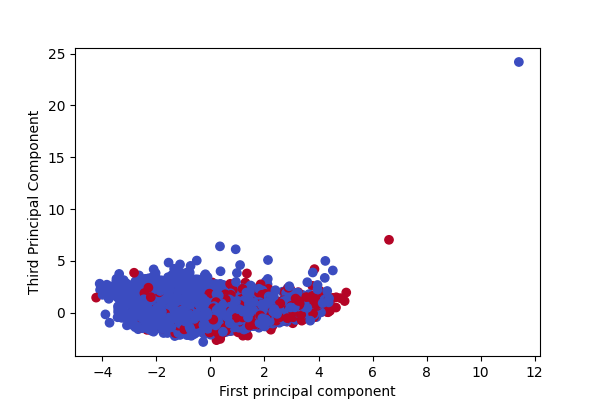

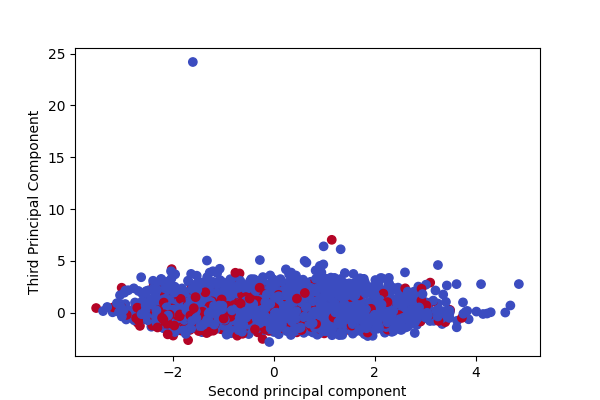

In [64]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# plot pca
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.show()



In [ ]:
# slider dans tous les axes pour voir les composantes
from ipywidgets import interact, fixed
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_pca(i, j, k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_train_pca[:, i-1], X_train_pca[:, j-1], X_train_pca[:, k-1], c=y_train, label="Default", cmap='coolwarm')
    ax.set_xlabel(f"PCA {i}")
    ax.set_ylabel(f"PCA {j}")
    ax.set_zlabel(f"PCA {k}")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Target")
    plt.title("PCA 3D Components Visualization")
    plt.show()

interact(plot_3d_pca, i=(1,3), j=(1, 3), k=(1, 3))


# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_train_pca[:, 2], X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label="Default", cmap='coolwarm')
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")
# cbar = plt.colorbar(scatter)
# cbar.set_label("Target")
# plt.title("PCA 3D Components Visualization")
# plt.show()

---
## ***Modèles***
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
# dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),

    "Naive Bayes": GaussianNB(),
    "Dummy": DummyClassifier( strategy='most_frequent', random_state=42)   # COMPARAISON IMPORTANTE
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# plot un tableau avec les scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
print(model_compare.T)



# confusion matrix
y_preds = models['XGBoost'].predict(X_test)
confusion_matrix(y_test, y_preds)
# plot confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.ylabel("true label")
    plt.xlabel("predicted label")

plot_conf_mat(y_test, y_preds)

# roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



# plot roc curve

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} AUC: {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], "--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(models, X_test, y_test)






In [ ]:
# afficher les predictions et la vraie valeur par age
X_test2 = X_test.copy()
X_test2["y_preds"] = y_preds
X_test2["y_test"] = y_test


X_test2["Age"] = df["Age"]
X_test2["Job tenure"] = df["Job tenure"]



# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(6,3))
plot = sns.countplot(x='Age', hue='y_preds', data=X_test2)
plt.title('Predictions en fct de Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')


# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(6,3))
plot = sns.countplot(x='Age', hue='y_test', data=X_test2)
plt.title('True label en fct de Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

In [ ]:
plt.figure(figsize=(8,4))
plot = sns.countplot(x='Job tenure', hue='y_preds', data=X_test2)
plt.title('Predictions en fct de Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')


# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(8,4))
plot = sns.countplot(x='Job tenure', hue='y_test', data=X_test2)
plt.title('True label en fct de Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

In [ ]:
# balanced accuracy score
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_preds):.2f}%")


# on choisit la balanced accuracy score car les classes sont desequilibrées

Balanced accuracy score: 0.61%


### ***Evaluate Classifier***

In [65]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from IPython.display import display, HTML
from sklearn.metrics import r2_score

def evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)


    # Vérifie si le classificateur a une méthode `predict_proba`
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]  # scores de la classe positive
        auc_score = roc_auc_score(y_test, y_proba)
    elif hasattr(clf, "decision_function"):  # Utiliser `decision_function` si disponible
        y_scores = clf.decision_function(X_test)
        auc_score = roc_auc_score(y_test, y_scores)
    else:
        auc_score = None

    y_pred = clf.predict(X_test)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores_balanced_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)

    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"<br/>"
        f"<span style='color:yellow;'><b>Balanced accuracy: {balanced_score:7.2%}</b></span> <br/>"
        f"<br/>"
        f"Cross-validation score (Balanced Accuracy): <span style='color:yellow;'> <b>{mean_cv_score_balanced_accuracy:7.2%}</b></span>  <br/>"
        f"<br/>"
        f"AUC: <b>{auc_score:7.2%}</b> <br/>" if auc_score is not None else ""
        f"<br/>"
        f"R2: <b>{r2:7.2%}</b> <br/>"
        f"<br/>"
    ))
    return round(balanced_score,3), round(auc_score,3)



def pca_evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    y_pred = clf.predict(X_test_pca)
    # Vérifie si le classificateur a une méthode `predict_proba`
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test_pca)[:, 1]  # scores de la classe positive
        auc_score = roc_auc_score(y_test, y_proba)
    elif hasattr(clf, "decision_function"):  # Utiliser `decision_function` si disponible
        y_scores = clf.decision_function(X_test_pca)
        auc_score = roc_auc_score(y_test, y_scores)
    else:
        auc_score = None

    balanced_score = balanced_accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores_balanced_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)

    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"<br/>"
        f"<span style='color:yellow;'><b>Balanced accuracy: {balanced_score:7.2%}</b></span> <br/>"
        f"<br/>"
        f"Cross-validation score (Balanced Accuracy): <span style='color:yellow;'> <b>{mean_cv_score_balanced_accuracy:7.2%}</b></span>  <br/>"
        f"<br/>"
        f"AUC: <b>{auc_score:7.2%}</b> <br/>" if auc_score is not None else ""
        f"<br/>"
        f"R2: <b>{r2:7.2%}</b> <br/>"
        f"<br/>"
    ))
    return round(balanced_score,3), round(auc_score,3)


---
## ***Grid Search***
---

---
## ***Tests différentes méthodes de preprocessing et modèles***
---

In [105]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
evaluate_classifier(model_rf)



ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [67]:
from xgboost import XGBClassifier

model_xg = XGBClassifier()
pca_evaluate_classifier(model_xg)


(0.571, 0.683)

In [68]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent', random_state=42)
evaluate_classifier(model)

# plot feature import

(0.5, 0.5)

In [69]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(C=100, max_iter=1000, penalty='l2', solver='liblinear')

evaluate_classifier(lreg)

(0.551, 0.763)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
evaluate_classifier(model_knn)




(0.589, 0.676)

In [74]:
from sklearn.base import clone
model_lr_balanced = clone(model_xg)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train==1)
model_lr_balanced.set_params(scale_pos_weight = ratio)
model_lr_balanced.name = "XGBoost with balanced weights"
evaluate_classifier(model_lr_balanced)


(0.648, 0.709)

In [44]:
from sklearn.pipeline import make_pipeline

model_rf_balanced = make_pipeline(RandomForestClassifier(n_estimators=320,
                                 max_depth=10,
                                 min_samples_split=4,
                                 min_samples_leaf=1,
                                 class_weight='balanced'
                                 ))
model_rf_balanced.name = "Balanced Random Forest"

evaluate_classifier(model_rf_balanced)

(0.681, 0.759)

#### ***Comparaison des résultats obtenus des différents modèles peu sattisfaisants par rapport au Dummy Classifier***

In [55]:
import matplotlib.pyplot as plt
import numpy as np

models = [model_rf_balanced, model_knn, lreg, model_rf, model_xg, model, relu, xgb]


def evaluate_models(models, evaluate_classifier):
    """
    Évalue une liste de modèles et retourne un DataFrame avec le balanced_accuracy et l'AUC de chaque modèle.

    Parameters:
    - models: liste de modèles à évaluer.
    - evaluate_classifier: fonction qui prend en entrée un modèle et retourne (balanced_accuracy, AUC).

    Returns:
    - DataFrame pandas avec les colonnes 'Modèle', 'Balanced Accuracy', 'AUC'.
    """
    # Initialiser les listes pour stocker les résultats
    model_names = []
    balanced_accuracies = []
    aucs = []

    # Boucler sur chaque modèle, l'évaluer et stocker ses performances
    for model in models:
        balanced_accuracy, auc = evaluate_classifier(model)
        model_names.append(str(model))  # Utiliser str(model) ou une autre méthode pour nommer les modèles
        balanced_accuracies.append(balanced_accuracy)
        aucs.append(auc)

    # Créer un DataFrame avec les résultats
    results_df = pd.DataFrame({
        'Modèle': model_names,
        'Balanced Accuracy': balanced_accuracies,
        'AUC': aucs
    })

    return results_df


evaluate_models(models,evaluate_classifier)




,Modèle,Balanced Accuracy,AUC
0,"Pipeline(steps=[('randomforestclassifier',\n ...",0.680,0.752
1,KNeighborsClassifier(),0.589,0.676
2,"LogisticRegression(C=100, max_iter=1000, solve...",0.551,0.763
3,RandomForestClassifier(),0.567,0.733
4,"XGBClassifier(base_score=None, booster=None, c...",0.605,0.725
5,"DummyClassifier(random_state=42, strategy='mos...",0.500,0.500
6,"Pipeline(steps=[('reludnnclassifier', ReluDNNC...",0.553,0.782
7,XGB2Classifier(),0.565,0.762


from matplotlib import pyplot as plt
_df_0['Balanced Accuracy'].plot(kind='hist', bins=20, title='Balanced Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AUC'].plot(kind='hist', bins=20, title='AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Modèle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Balanced Accuracy', y='AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Balanced Accuracy'].plot(kind='line', figsize=(8, 4), title='Balanced Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['AUC'].plot(kind='line', figsize=(8, 4), title='AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Modèle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Balanced Accuracy', y='Modèle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Modèle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='AUC', y='Modèle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Validation ...

In [129]:
exp.data_loader(data=df)

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
0,1,34,55,4875,3087,0,36,0.0479,0,1,1,0
2,3,14,38,17190,14190,0,60,0.0882,0,0,0,0
3,4,16,37,22773,23568,0,48,0.1101,0,1,1,0
5,6,17,50,10250,5750,0,48,0.1102,0,0,1,0
6,7,8,45,8050,6050,0,48,0.0604,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4007,4008,0,25,3150,2925,0,24,0.0938,0,0,0,1
7284,7285,2,20,16877,17016,0,72,0.0871,0,0,0,1
1046,1047,10,70,7190,8393,0,60,0.1436,1,0,0,1
1157,1158,4,59,12909,12011,0,60,0.1518,0,0,0,1


In [130]:
exp.data_summary(feature_exclude=["Default (y, target variable)","ID"], feature_type={})

Numerical Attributes 
 
 
   
 name 
 n_missing 
 mean 
 std 
 min 
 q1 
 median 
 q3 
 max 
 
 
 
 
 0 
 ID 
 0 
 3731.8600 
 2144.8800 
 1.0000 
 1880.0000 
 3737.0000 
 5583.0000 
 7440.0000 
 
 
 1 
 Job tenure 
 0 
 10.0238 
 10.1398 
 0.0000 
 2.0000 
 6.0000 
 16.0000 
 58.0000 
 
 
 2 
 Age 
 0 
 46.0741 
 14.3483 
 18.0000 
 34.0000 
 47.0000 
 56.0000 
 88.0000 
 
 
 3 
 Car price 
 0 
 12881.9828 
 6170.6439 
 546.0000 
 8160.0000 
 11950.0000 
 16499.0000 
 47051.0000 
 
 
 4 
 Funding amount 
 0 
 11109.9017 
 5834.1249 
 546.0000 
 6621.0000 
 10001.0000 
 14500.0000 
 30000.0000 
 
 
 5 
 Loan duration 
 0 
 55.0923 
 19.3816 
 6.0000 
 48.0000 
 60.0000 
 72.0000 
 96.0000 
 
 
 6 
 Monthly payment 
 0 
 0.1026 
 0.0612 
 0.0051 
 0.0669 
 0.0926 
 0.1262 
 2.6300 
 
 
 

 
 Categorical Attributes 
 
 
   
 name 
 n_missing 
 n_unique 
 top1 
 top2 
 top3 
 n_others 
 
 
 
 
 0 
 Down payment 
 0 
 2 
 0.0 : 5633 
 1.0 : 632 
 0 
 0 
 
 
 1 
 Credit event 
 0 
 2 
 0.0 : 6173 
 1.0 : 92 
 0 
 0 
 
 
 2 
 Married 
 0 
 2 
 1.0 : 3544 
 0.0 : 2721 
 0 
 0 
 
 
 3 
 Homeowner 
 0 
 2 
 0.0 : 3648 
 1.0 : 2617 
 0 
 0 
 
 
 4 
 Default (y, target variable) 
 0 
 2 
 0.0 : 5952 
 1.0 : 313 
 0 
 0

Data Shape:(6265, 12)


In [131]:
exp.data_prepare(target='Default (y, target variable)', task_type='classification', test_ratio=0.2, random_state=0)

,Config,Value
0,Excluded columns,[ID]
1,Target variable,"Default (y, target variable)"
2,Sample weight,None
3,Task type,classification
4,Split method,random
5,Test ratio,0.2
6,Random state,0


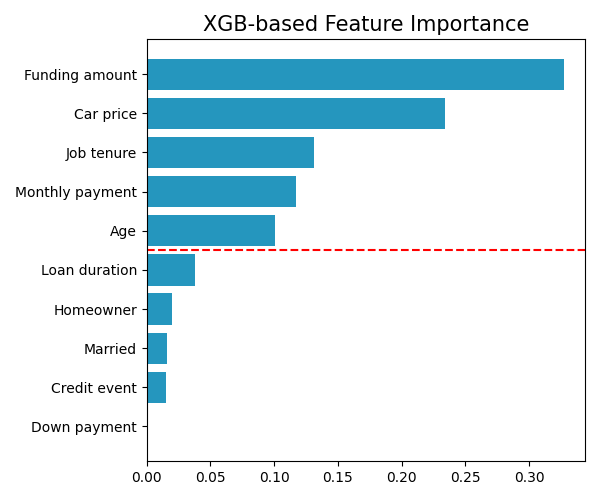

In [62]:
exp.feature_select(method="pfi", threshold=0.9, figsize=(6, 5))

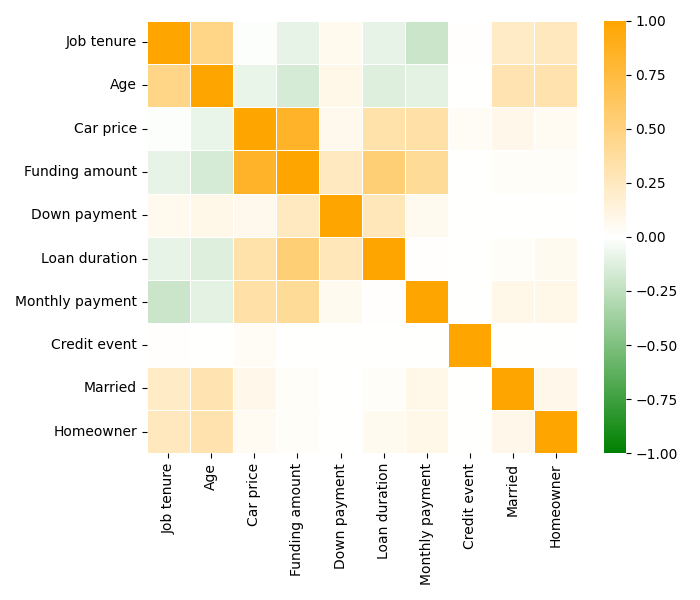

In [75]:
exp.eda(show='multivariate', multi_type='correlation_heatmap', figsize=(7, 6))

---

---

---

In [ ]:
import scipy

# **DEEP WHITE BOXES**

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from piml.models import ReluDNNClassifier
from sklearn.metrics import roc_auc_score


relu = make_imb_pipeline(ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001))
relu.name = "ReluDNN"
evaluate_classifier(relu)

(0.553, 0.782)

In [53]:
from piml.models import XGB2Classifier


xgb =XGB2Classifier()

evaluate_classifier(xgb)

(0.565, 0.762)

In [54]:
from piml.models import GAMINetClassifier

gam = make_imb_pipeline(SMOTE(),GAMINetClassifier())

gam.name = "GAMINet + SMOTE"

evaluate_classifier(gam)

KeyboardInterrupt: 

In [77]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

clf1 = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')

exp.model_diagnose(model="ReLU-DNN", show='accuracy_table')

'The model is already registered.'

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8058,0.7412,0.1202,0.4446,0.1409
Test,0.8065,0.7575,0.1000,0.4282,0.1378
Gap,0.0007,0.0163,-0.0202,-0.0164,-0.0031


In [ ]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

parameters = {
    "hidden_layer_sizes": [(40, 40), (50, 50), (60, 60)],
    "l1_reg": [0.0008, 0.001, 0.0012],
    "batch_size": [500, 1000, 2000],
    "learning_rate": [0.001, 0.01, 0.1]
}

result = exp.model_tune("ReLU-DNN", method="randomized", parameters=parameters, n_runs=100, metric="AUC", test_ratio=0.2)
params = result.get_params_ranks(rank=1)
exp.model_train(ReluDNNClassifier(**params), name="ReLU-DNN-FT")

exp.model_diagnose(model="ReLU-DNN-FT", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8090,0.7558,0.1634,0.4346,0.1388
Test,0.8065,0.7720,0.1111,0.4199,0.1340
Gap,-0.0025,0.0162,-0.0522,-0.0148,-0.0047


In [ ]:
from piml.models import GAMINetClassifier

gam = GAMINetClassifier()
exp.model_train(model=gam, name="GAMI-Net")

parameters = {
    "interact_num": [10, 20, 30],
    "loss_threshold": [0.01, 0.1, 0.2]
}

result = exp.model_tune("GAMI-Net", method="randomized", parameters=parameters, n_runs=100,
                        metric="AUC", test_ratio=0.2)
params = result.get_params_ranks(rank=1)
exp.model_train(GAMINetClassifier(**params), name="GAMI-Net")

exp.model_diagnose(model="GAMI-Net", show='accuracy_table')

'The model is already registered.'

'The model is already registered.'

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8071,0.7576,0.1823,0.4334,0.1379
Test,0.8044,0.7632,0.1466,0.4242,0.1362
Gap,-0.0027,0.0056,-0.0357,-0.0092,-0.0017


In [78]:
from piml.models import XGB2Classifier
exp.model_train(model=XGB2Classifier(), name="XGB2")
exp.model_diagnose(model="XGB2", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8281,0.8127,0.3513,0.3944,0.1243
Test,0.8071,0.7723,0.2622,0.4208,0.1352
Gap,-0.0210,-0.0404,-0.0891,0.0264,0.0109


In [132]:
from piml.models import TreeClassifier
exp.model_train(model=TreeClassifier(), name="Tree")
exp.model_diagnose(model="Tree", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.9517,0.7854,0.1037,0.1652,0.0422
Test,0.9505,0.6476,0.0882,0.3061,0.0478
Gap,-0.0012,-0.1379,-0.0155,0.1408,0.0056


# **BLACK BOXES**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
exp.model_train(model=clf, name='RandomForestClassifier')

parameters = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, 50],
    "min_samples_split": [2, 6,10],
    "min_samples_leaf": [1, 5]
}

result = exp.model_tune("RandomForestClassifier", method="randomized", parameters=parameters, n_runs=100,
                        metric="AUC", test_ratio=0.2)
params = result.get_params_ranks(rank=1)
exp.model_train(RandomForestClassifier(**params), name="RandomForestClassifier-FT")

exp.model_diagnose(model="RandomForestClassifier", show='accuracy_table')

'The model is already registered.'

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,1.0000,1.0000,1.0000,0.1136,0.0203
Test,0.8065,0.7280,0.2976,0.5356,0.1418
Gap,-0.1935,-0.2720,-0.7024,0.4219,0.1214


In [79]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
exp.model_train(model=xgb, name='XGBClassifier')
exp.model_diagnose(model="XGBClassifier", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.9336,0.9846,0.8083,0.2043,0.0556
Test,0.7950,0.7347,0.3021,0.4709,0.1495
Gap,-0.1386,-0.2498,-0.5063,0.2666,0.0939


In [80]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
exp.model_train(model=mlp, name='MLPClassifier')
exp.model_diagnose(model="MLPClassifier", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8101,0.7603,0.2719,0.4315,0.1366
Test,0.8132,0.7667,0.2606,0.4211,0.1347
Gap,0.0030,0.0065,-0.0113,-0.0105,-0.0018


# **WHITE BOXES**

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(C=100, max_iter=1000, penalty='l2', solver='liblinear')
exp.model_train(model=lreg, name='LogisticRegression')
exp.model_diagnose(model="LogisticRegression", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8043,0.7413,0.1364,0.4451,0.1409
Test,0.8044,0.7569,0.1155,0.4290,0.1382
Gap,0.0002,0.0156,-0.0209,-0.0161,-0.0027


In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
exp.model_train(model=knn, name='KNeighborsClassifier')
exp.model_diagnose(model="KNeighborsClassifier", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8436,0.8678,0.5019,0.3234,0.1085
Test,0.7950,0.6648,0.3207,2.1174,0.1596
Gap,-0.0486,-0.2030,-0.1812,1.7940,0.0511


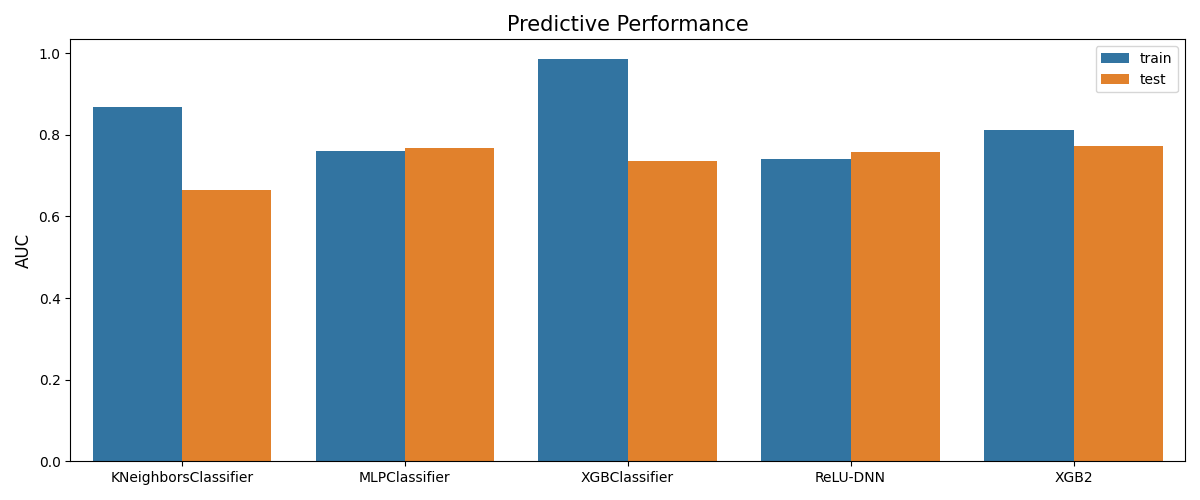

In [87]:
exp.model_compare(models=["KNeighborsClassifier","MLPClassifier", "XGBClassifier", "ReLU-DNN", "XGB2"], show="accuracy_plot", metric="AUC", figsize=(12, 5))

In [136]:
exp.model_interpret(model="XGB2", show="local_fi", sample_id=39, centered=False, original_scale=True, figsize=(6, 4))

'XGB2 is not registered yet.'

AttributeError: 'NoneType' object has no attribute 'estimator'

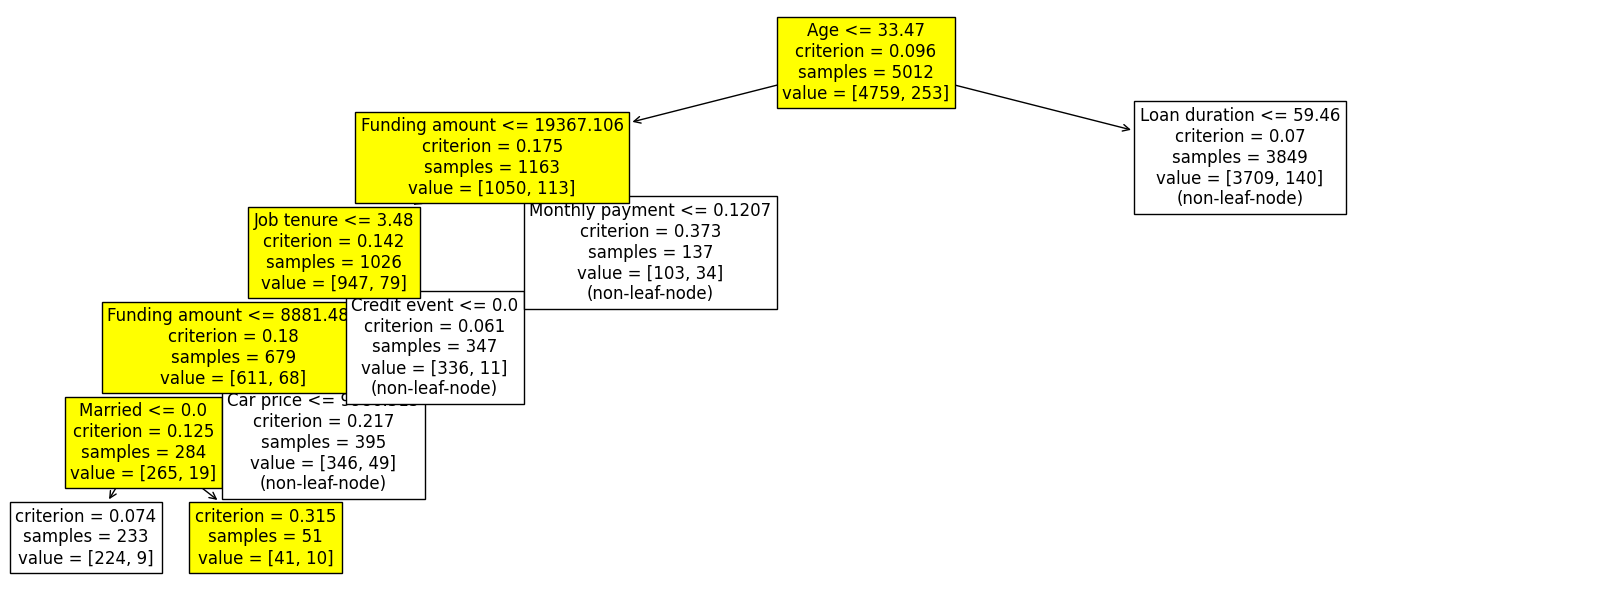

In [135]:
exp.model_interpret(model="Tree", show="tree_local", sample_id=36, original_scale=True, figsize=(16, 6))

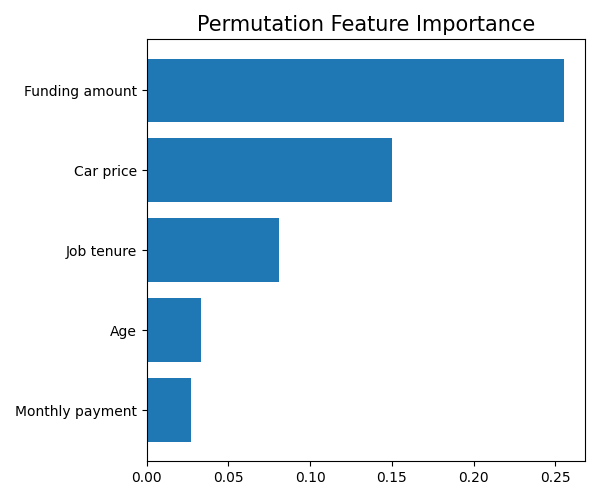

In [88]:
exp.model_explain(model='XGB2', show='pfi', sample_size=20, figsize=(6, 5))

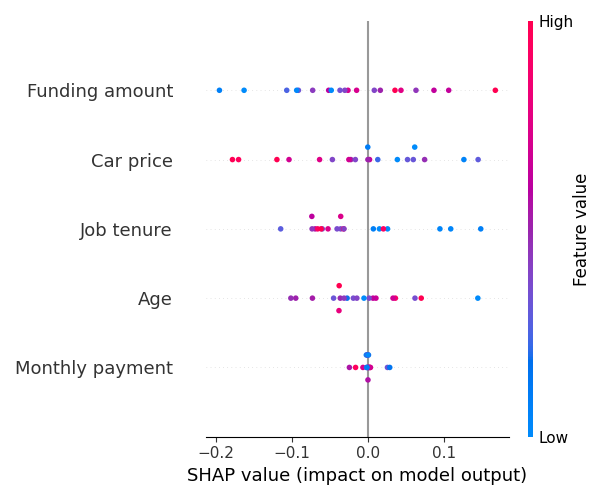

In [89]:
exp.model_explain(model='KNeighborsClassifier', show='shap_summary', sample_size=20, figsize=(6, 5))

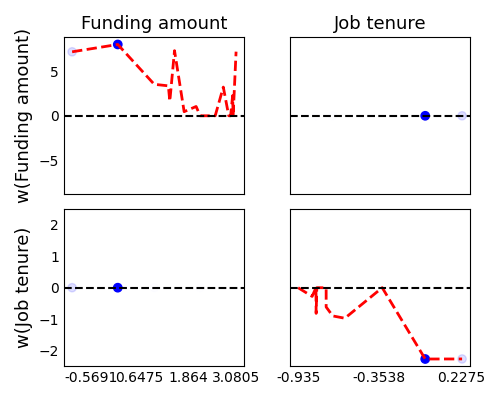

In [98]:
exp.model_interpret(model="ReLU-DNN", show="global_effect_plot", bi_features=["Funding amount", "Job tenure"],
                    original_scale=True, figsize=(5, 4))